In [ ]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Interest Payments.xlsx to Interest Payments.xlsx
Saving Public Debt (Ksh Million).csv to Public Debt (Ksh Million).csv
Saving Annual GDP (1).xlsx to Annual GDP (1).xlsx


In [ ]:
# Load the dataset
debt_df = pd.read_csv('Public Debt (Ksh Million).csv', sep=None, engine='python')
interest_df = pd.read_excel('Interest Payments.xlsx')
GDP_df = pd.read_excel('Annual GDP (1).xlsx')

In [ ]:
# Display the first few rows for public debt
debt_df.head()

,Year,Month,Domestic Debt,External Debt,Total
0,2023,December,5050108.539,6089584.983,11139693.52
1,2022,December,4472838.52,4673144.13,9145982.65
2,2021,December,"4,032,368.18","4,174,371.53","8,206,739.71"
3,2021,November,"4,008,077.30","4,109,282.85","8,117,360.15"
4,2021,October,"3,959,523.30","4,083,124.54","8,042,647.84"


In [ ]:
# Display the first few rows for Annual GDP
GDP_df.head()

,Year,Nominal GDP prices (Ksh Million),Annual GDP growth (%),Real GDP prices (Ksh Million)
0,2023,"15,108,806",5.6,"10,399,980"
1,2022,"13,489,642",4.9,"9,852,583"
2,2021,"12,027,662",7.6,"9,395,942"
3,2020,"10,715,070",-0.3,"8,733,060"
4,2019,"10,237,727",5.1,"8,756,946"


In [ ]:
# Display the first few rows for interest payment
interest_df.head()

,Year,Month,Domestic Interest,Foreign Interest
0,1999,9,3816.0,3068.0
1,1999,12,8935.0,4597.0
2,2000,3,15784.0,6039.0
3,2000,6,20752.0,8635.0
4,2000,7,2739.0,746.0


In [ ]:
# Explore the data types
print('Public Debt\n',debt_df.info(), '\n')
print('Interest Payments\n',interest_df.info(), '\n')
print('GDP\n',GDP_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           264 non-null    int64 
 1   Month          264 non-null    object
 2   Domestic Debt  264 non-null    object
 3   External Debt  264 non-null    object
 4   Total          264 non-null    object
dtypes: int64(1), object(4)
memory usage: 10.4+ KB
Public Debt
 None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               299 non-null    int64  
 1   Month              299 non-null    int64  
 2   Domestic Interest  299 non-null    float64
 3   Foreign Interest   299 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 9.5 KB
Interest Payments
 None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 ent

In [ ]:
# Find missing values
print('Public Debt\n', debt_df.isnull().sum(), '\n')
print('Interest Payments\n', interest_df.isnull().sum(), '\n')
print('GDP\n', GDP_df.isnull().sum())

Public Debt
 Year             0
Month            0
Domestic Debt    0
External Debt    0
Total            0
dtype: int64 

Interest Payments
 Year                 0
Month                0
Domestic Interest    0
Foreign Interest     0
dtype: int64 

GDP
 Year                                0
Nominal GDP prices (Ksh Million)    0
Annual GDP growth (%)               0
Real GDP prices (Ksh Million)       0
dtype: int64


In [ ]:
# Convert Domestic Debt, External Debt and Total to numeric
# Domestic Debt
debt_df['Domestic Debt'] = debt_df['Domestic Debt'].str.replace(',', '')
debt_df['Domestic Debt'] = pd.to_numeric(debt_df['Domestic Debt'], errors='coerce')

# External Debt
debt_df['External Debt'] = debt_df['External Debt'].str.replace(',', '')
debt_df['External Debt'] = pd.to_numeric(debt_df['External Debt'], errors='coerce')

# Total
debt_df['Total'] = debt_df['Total'].str.replace(',', '')
debt_df['Total'] = pd.to_numeric(debt_df['Total'], errors='coerce')

In [ ]:
# Convert Real GDP and Nominal GDP Prices to numeric
# Nominal GDP
GDP_df['Nominal GDP prices (Ksh Million)'] = (
    GDP_df['Nominal GDP prices (Ksh Million)']
    .astype(str)
    .str.replace(',', '', regex=False)
    .str.strip()
)
GDP_df['Nominal GDP prices (Ksh Million)'] = pd.to_numeric(GDP_df['Nominal GDP prices (Ksh Million)'], errors = 'coerce')




#For real GDP
GDP_df['Real GDP prices (Ksh Million)'] = (
    GDP_df['Real GDP prices (Ksh Million)']
    .astype(str)
    .str.replace(',', '', regex=False)
    .str.strip()
)
GDP_df['Real GDP prices (Ksh Million)'] = pd.to_numeric(GDP_df['Real GDP prices (Ksh Million)'], errors = 'coerce')

In [ ]:
# Filter to only December values per year
debt_df = debt_df[debt_df['Month'] == 'December']
debt_df.head()

,Year,Month,Domestic Debt,External Debt,Total
0,2023,December,5050108.539,6089584.983,11139693.52
1,2022,December,4472838.520,4673144.130,9145982.65
2,2021,December,4032368.180,4174371.530,8206739.71
14,2020,December,3488541.180,3793285.240,7281826.42
26,2019,December,2942103.540,3106822.960,6048926.50


In [ ]:
# Filter to 12 for interest dataframe
interest_df = interest_df[interest_df['Month']==12]
interest_df.head()


,Year,Month,Domestic Interest,Foreign Interest
1,1999,12,8935.0,4597.0
9,2000,12,11302.0,2232.0
21,2001,12,11985.0,4150.0
33,2002,12,13533.0,5634.0
45,2003,12,12701.0,3382.0


In [ ]:
# Drop Month Column for Interest Dataframe
interest_df.drop('Month', axis=1, inplace=True)

<ipython-input-13-dc611b0f43e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interest_df.drop('Month', axis=1, inplace=True)


In [ ]:
# Drop Month Column
debt_df.drop('Month', axis=1, inplace=True)

<ipython-input-14-f3363dde6f53>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  debt_df.drop('Month', axis=1, inplace=True)


In [ ]:
# Filter the DataFrame for years between 2000 and 2023 (inclusive)
debt_df = debt_df[(debt_df['Year'] >= 2000) & (debt_df['Year'] <= 2023)]
GDP_df = GDP_df[(GDP_df['Year'] >= 2000) & (GDP_df['Year'] <= 2023)]
interest_df = interest_df[(interest_df['Year'] >= 2000) & (interest_df['Year'] <= 2023)]

In [ ]:
# Calculating YoY debt growth rate
debt_df = debt_df.copy()
debt_df = debt_df.sort_values('Year')
debt_df['YoY Growth Rate'] = debt_df['Total'].pct_change() * 100

In [ ]:
# First merge debt and GDP
merged_df = pd.merge(debt_df, GDP_df[['Year', 'Real GDP prices (Ksh Million)', 'Nominal GDP prices (Ksh Million)']], on='Year', how='inner')

# Then merge the result with interest data
merged_df = pd.merge(merged_df, interest_df[['Year', 'Domestic Interest', 'Foreign Interest']], on='Year', how='inner')


In [ ]:
merged_df.head()

,Year,Domestic Debt,External Debt,Total,YoY Growth Rate,Real GDP prices (Ksh Million),Nominal GDP prices (Ksh Million),Domestic Interest,Foreign Interest
0,2000,192665.30,405355.31,598020.61,NaN,982855,967838,11302.0,2232.0
1,2001,221984.00,384302.58,606286.58,1.382222,1020111,1020022,11985.0,4150.0
2,2002,259828.23,369729.83,629558.06,3.838363,1025583,1035374,13533.0,5634.0
3,2003,301190.58,410149.00,711339.58,12.990306,1055658,1131783,12701.0,3382.0
4,2004,295374.44,439992.95,735367.39,3.377826,1109338,1274328,9777.0,4121.0


In [ ]:
# Calculating Debt composition (%): domestic vs external
merged_df['Domestic Debt Composition'] = (merged_df['Domestic Debt'] / merged_df['Total']) * 100
merged_df['External Debt Composition'] = (merged_df['External Debt'] / merged_df['Total']) * 100


In [ ]:
# Calculating Debt-to-GDP ratio
merged_df['Debt_to_GDP_Ratio'] = (merged_df['Total'] / merged_df['Nominal GDP prices (Ksh Million)']) * 100

In [ ]:
# Calculating Total Interest Paid
merged_df['Total Interest Paid'] = merged_df['Domestic Interest'] + merged_df['Foreign Interest']

In [ ]:
# Calculating Interest-to-Debt Ratio
merged_df['Interest-to-Debt-Ratio'] = merged_df['Total Interest Paid'] / merged_df['Total']

In [ ]:
# Calculating Composition of Foreign vs Domestic Interest
merged_df['Domestic Interest Composition'] = merged_df['Domestic Debt'] / merged_df['Total Interest Paid']
merged_df['Foreign Interest Composition'] = merged_df['External Debt'] / merged_df['Total Interest Paid']

In [ ]:
# Year-on-Year Interest Growth Rates
merged_df = merged_df.sort_values('Year')
merged_df['YoY Interest Growth Rate'] = merged_df['Total Interest Paid'].pct_change() * 100

In [ ]:
# Year-on-Year Debt Growth
merged_df = merged_df.sort_values('Year')
merged_df['YoY Debt Growth Rate'] = merged_df['Total'].pct_change() * 100

In [ ]:
# Foreign Interest Share(% of total interest)
merged_df['Foreign Interest Share'] = (merged_df['Foreign Interest'] / merged_df['Total Interest Paid']) * 100

In [ ]:
# Domestic Interest Share(% of total Interest)
merged_df['Domestic Interest Share'] = (merged_df['Domestic Interest'] / merged_df['Total Interest Paid']) * 100

In [ ]:
# Calculating Interest-to-GDP Ratio
merged_df['Interest_to_GDP_Ratio'] = (merged_df['Total Interest Paid'] / merged_df['Nominal GDP prices (Ksh Million)']) * 100

## Exploratory Data Analysis (EDA)

#Trend Charts

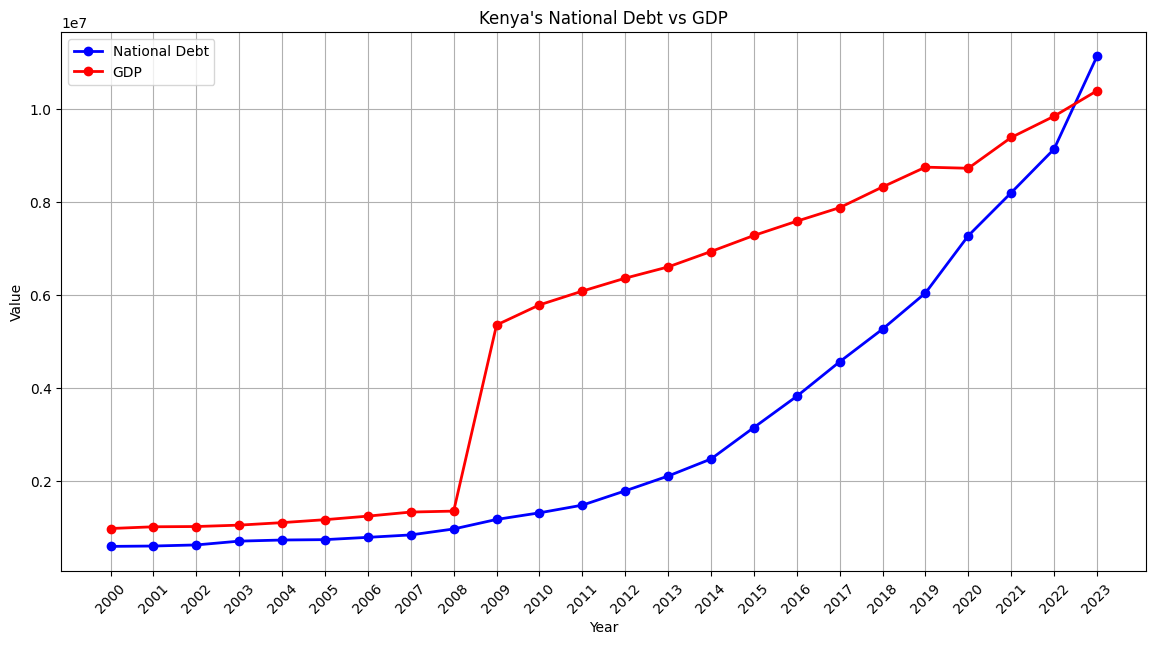

In [ ]:
# Plot a line chart of National Debt vs GDP
plt.figure(figsize=(14, 7))
# National Debt
plt.plot(merged_df['Year'],  merged_df['Total'], marker='o', linestyle='-', linewidth=2, color='blue')
# GDP
plt.plot(merged_df['Year'], merged_df['Real GDP prices (Ksh Million)'], marker='o', linestyle='-' ,linewidth=2, color='red')
# Show every year on the x-axis
plt.xticks(ticks=merged_df['Year'], labels=merged_df['Year'], rotation=45, fontsize=10)
plt.title("Kenya's National Debt vs GDP")
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(['National Debt', 'GDP'])
plt.grid(True)
plt.show()

##📈 Key Observations:
1. Period 2000–2008:
Both GDP and National Debt remained relatively stable and flat.

Implies limited economic expansion and borrowing.

This could reflect a pre-rebasing GDP, conservative debt practices, or lower public investment.

2. Around 2008:
GDP shoots up sharply—a sudden vertical rise.

This kind of jump usually doesn’t come from economic activity alone.

Likely caused by GDP rebasing, where the government recalculates GDP using a more recent base year or broader metrics (Kenya rebased GDP in 2014, retroactively affecting earlier years).

Debt continues rising steadily without a sharp spike.

3. 2009–2023:
Debt increases steadily, then accelerates significantly after 2014–2015.

GDP also continues growing, but at a more moderate, linear rate.

By 2023:

Debt nearly catches up to or surpasses GDP.

This hints at potential concerns about debt sustainability.



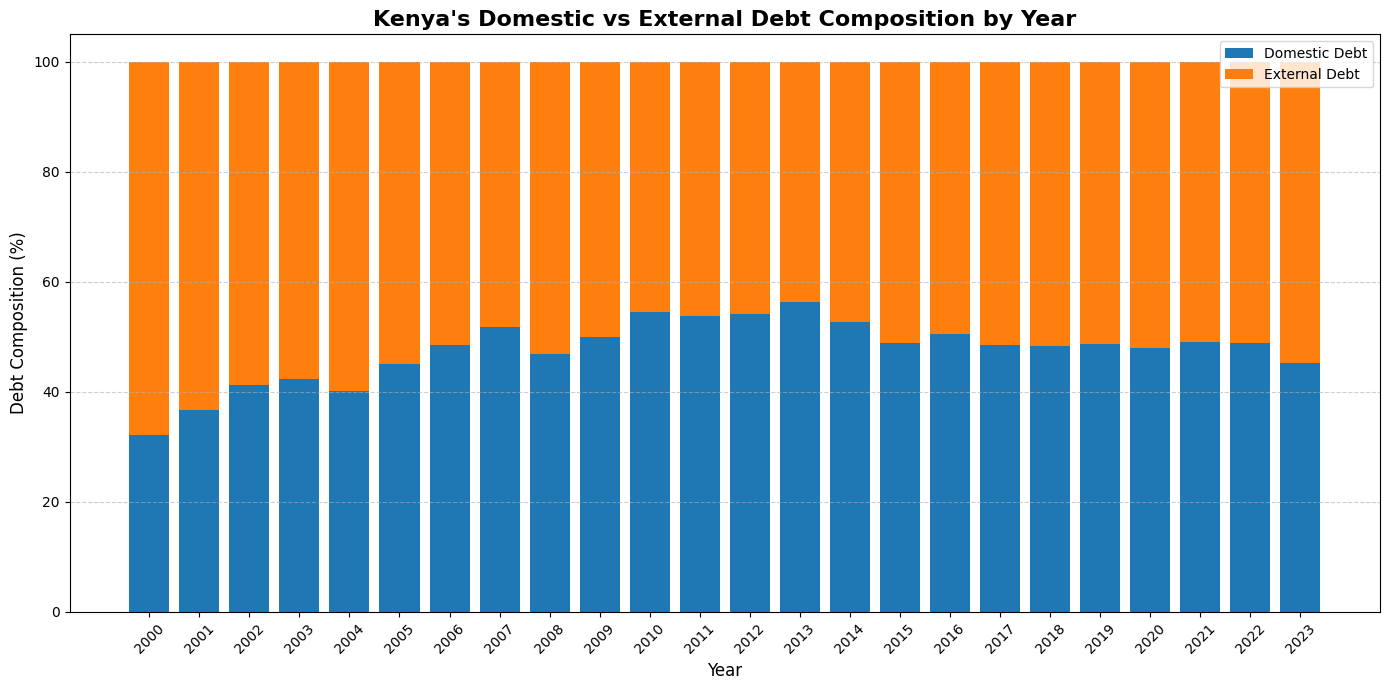

In [ ]:
# Plot Domestic Debt Vs Foreign Debt Composition
#Set figure size
fig, ax = plt.subplots(figsize=(14, 7))

# Plot for Domestic Debt
ax.bar(merged_df['Year'], merged_df['Domestic Debt Composition'], label='Domestic Debt', color='#1f77b4')

# Plot fot External Debt, stacked on top of Domestic Debt

ax.bar(merged_df['Year'], merged_df['External Debt Composition'], bottom=merged_df['Domestic Debt Composition'], label='External Debt', color='#ff7f0e')

# Title and Labels
ax.set_title("Kenya's Domestic vs External Debt Composition by Year", fontsize=16, weight='bold')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Debt Composition (%)', fontsize=12)

# Set x-axis ticks and labels
ax.set_xticks(merged_df['Year'])
ax.set_xticklabels(merged_df['Year'], rotation=45, fontsize=10)

# Add grid and legend
ax.grid(True, axis='y', linestyle='--', alpha=0.6)
ax.legend()

#Adjust layout
plt.tight_layout()

# Show the plot
plt.show()



## Key Insights from the Chart: Early Years (Left Side of the Chart):

External debt (orange) dominates, forming the larger portion of total debt.

Domestic debt (blue) is relatively smaller, especially around the early 2000s.

Mid Period (Approx. 2008–2016):

There's a notable rise in domestic debt relative to external debt.

At times, domestic debt slightly exceeds external debt, indicating a shift in financing strategy—possibly to reduce foreign exchange risk.

Recent Years (2017–2022):

The two components seem to stabilize around a more balanced composition.

Domestic debt maintains a slight lead, suggesting a consistent preference or reliance on local borrowing.

(2023)
It tends to now favor External borrowing over domestic borrowing.

Interpretation:

Shift Toward Domestic Borrowing: Over the two decades, Kenya appears to have diversified its debt strategy by increasing reliance on domestic sources.

Reduced Exposure to External Shocks: By increasing domestic debt, the government possibly aimed to mitigate risks tied to foreign exchange rates and global credit conditions.

Policy Implications: A more balanced debt composition can reflect efforts to strengthen domestic capital markets and enhance fiscal sustainability.

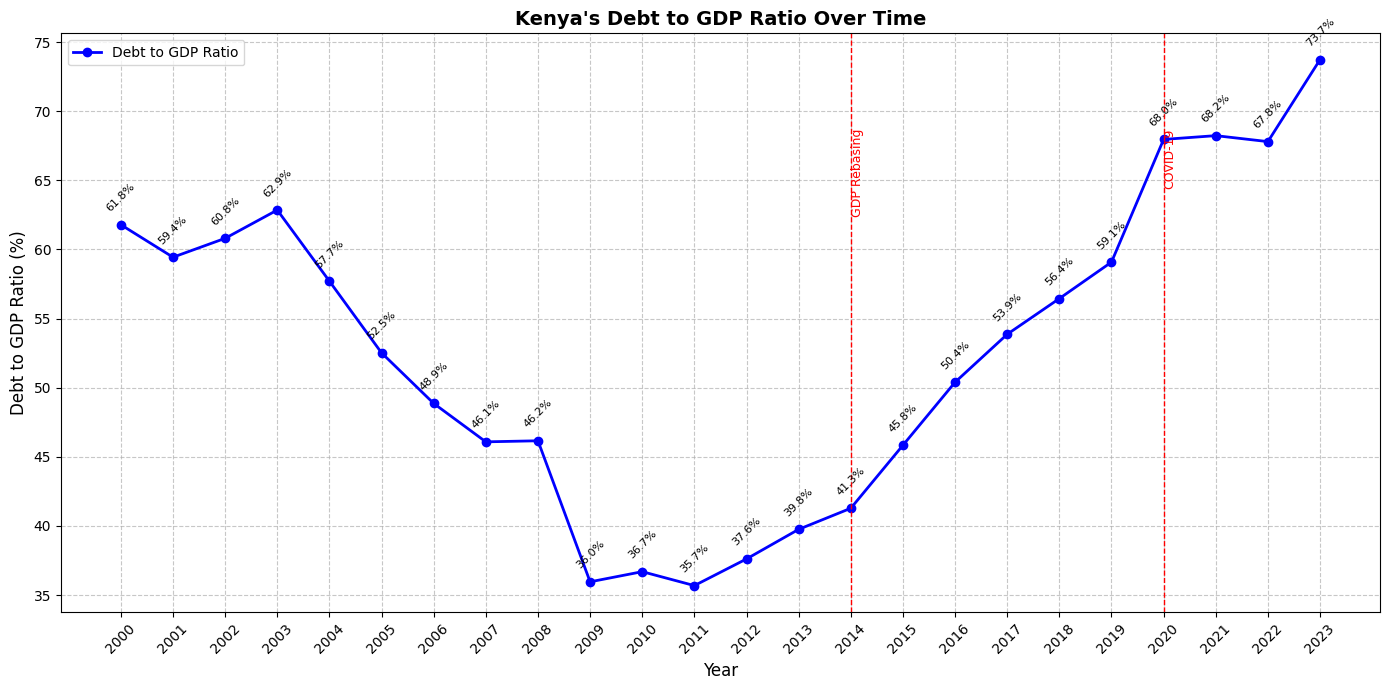

In [ ]:
# Plot a line chart to show the trend of Debt to GDP ratio over time
plt.figure(figsize=(14, 7))
plt.plot(merged_df['Year'], merged_df['Debt_to_GDP_Ratio'],
         marker='o', linestyle='-', linewidth=2, color='blue', label='Debt to GDP Ratio')

# Add data labels to each point
for x, y in zip(merged_df['Year'], merged_df['Debt_to_GDP_Ratio']):
    plt.text(x, y + 0.8, f'{y:.1f}%', ha='center', va='bottom', fontsize=8, rotation=45)

# Highlight key years with annotations
highlight_years = {2014: "GDP Rebasing", 2020: "COVID-19"}
for year, label in highlight_years.items():
    plt.axvline(x=year, color='red', linestyle='--', linewidth=1)
    plt.text(year, max(merged_df['Debt_to_GDP_Ratio']) - 5, label, color='red', rotation=90, va='top', fontsize=9)

# Enhance plot aesthetics
plt.xticks(ticks=merged_df['Year'], labels=merged_df['Year'], rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.title("Kenya's Debt to GDP Ratio Over Time", fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Debt to GDP Ratio (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

##📈 Trends Observed:
2000–2008:

A steady decline in the debt-to-GDP ratio.

It dropped from about 62% in 2000 to a low of around 35% in 2008.

This suggests Kenya was reducing its debt burden relative to its economy.

2009–2014:

The ratio remains relatively stable at low levels (35%–40%), with slight fluctuations.

This period corresponds to post-rebasing (2014), when GDP figures were adjusted upward, helping keep the ratio low.

2015–2019:

A sharp increase in the debt-to-GDP ratio—from about 45% to nearly 60%.

Indicates rising borrowing, possibly linked to infrastructure projects like the Standard Gauge Railway and growing fiscal deficits.

2020–2023:

A steep rise again, peaking at over 73% in 2023.

This was driven by COVID-19 impacts, higher government spending, reduced economic output, and more borrowing.



<ipython-input-32-1873a98591a5>:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


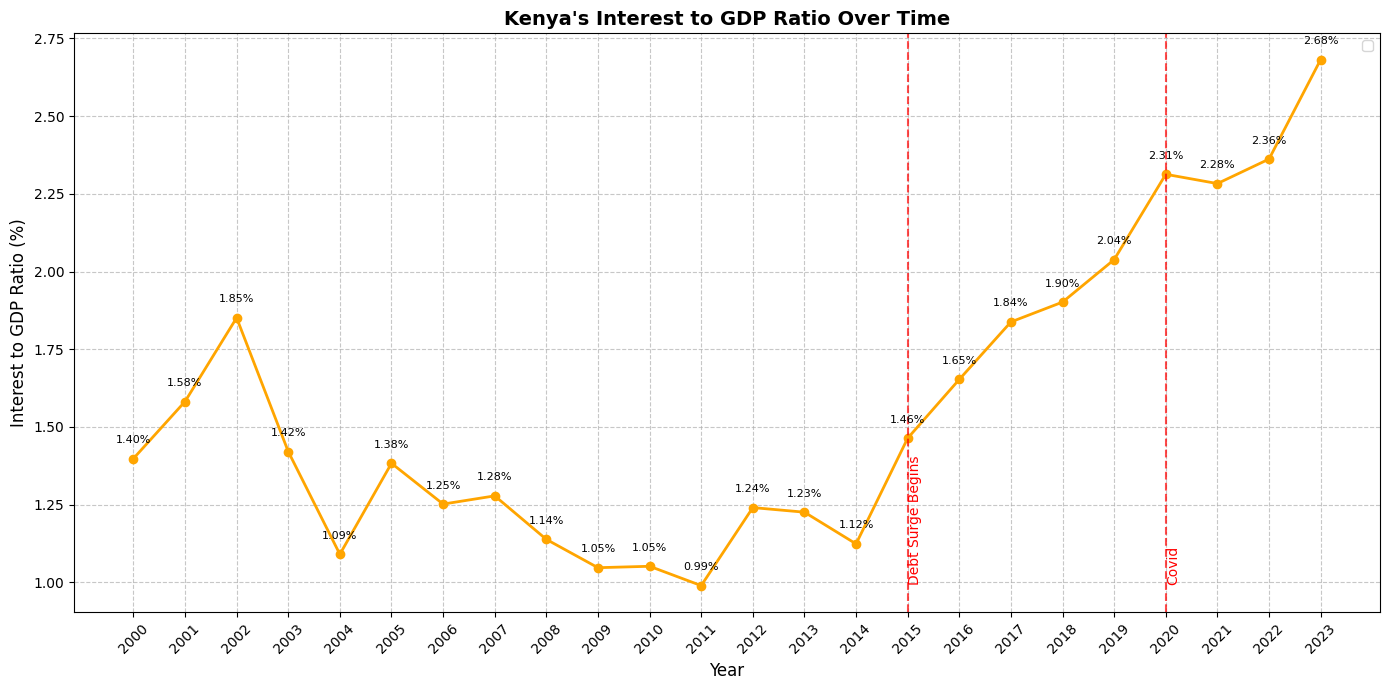

In [ ]:
# Plot a line chart to show how trend of the proportion  of GDP paid in interest per year
plt.figure(figsize=(14, 7))
plt.plot(merged_df['Year'], merged_df['Interest_to_GDP_Ratio'], marker='o', linestyle='-', linewidth=2, color='orange')

#Plot data labels
for x, y in zip(merged_df['Year'], merged_df['Interest_to_GDP_Ratio']):
    plt.text(x, y + 0.05, f'{y:.2f}%', ha='center', fontsize=8)

#Hightlight the places where a surge begins
plt.axvline(x=2015, linestyle='--', color='red', alpha=0.7)
plt.text(2015, 1.0, 'Debt Surge Begins', rotation=90, color='red')

plt.axvline(x=2020, linestyle='--', color='red', alpha=0.7)
plt.text(2020, 1.0, 'Covid', rotation=90, color='red')



# Enhance plot aesthetics
plt.xticks(ticks=merged_df['Year'], labels=merged_df['Year'], rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.title("Kenya's Interest to GDP Ratio Over Time", fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Interest to GDP Ratio (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


##Trend:

Relatively stable or slightly declining between 2004–2014.

Sharp increase from 2015 onwards, peaking in 2023 (~2.7%).

This suggests growing pressure on public finances, likely due to increasing debt burdens or higher interest costs.

<ipython-input-33-892620cd6b67>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=interest_df, x='Interest Type', y='Amount', palette=['#1f77b4', '#ff7f0e'])


<Figure size 1400x700 with 0 Axes>

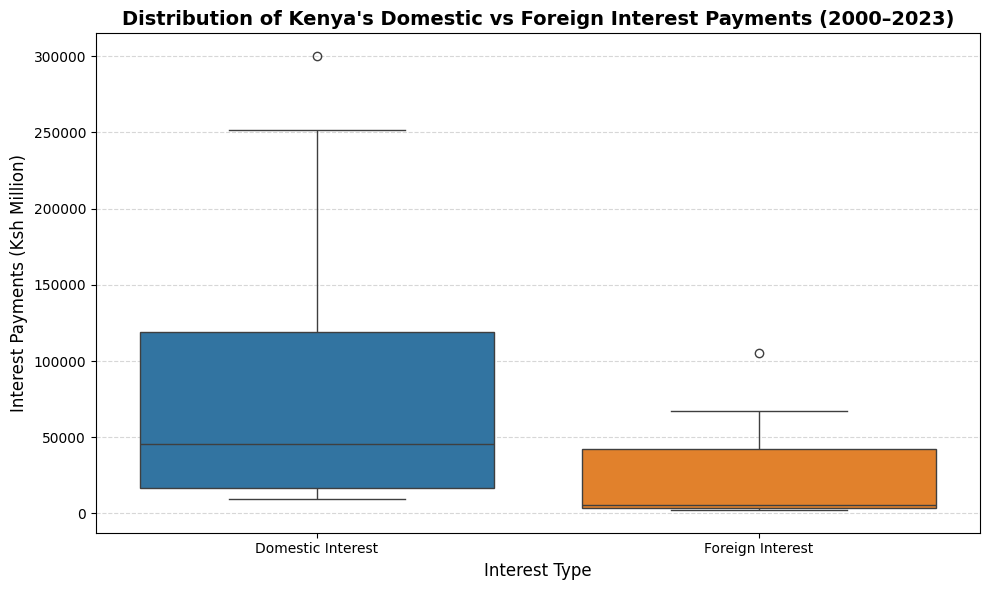

In [ ]:
# Plot Boxplots for Interest Payments
plt.figure(figsize=(14, 7))
interest_df = merged_df[['Year', 'Domestic Interest', 'Foreign Interest']].melt(
    id_vars='Year',
    value_vars=['Domestic Interest', 'Foreign Interest'],
    var_name='Interest Type',
    value_name='Amount'
)

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=interest_df, x='Interest Type', y='Amount', palette=['#1f77b4', '#ff7f0e'])

plt.title("Distribution of Kenya's Domestic vs Foreign Interest Payments (2000–2023)", fontsize=14, fontweight='bold')
plt.xlabel('Interest Type', fontsize=12)
plt.ylabel('Interest Payments (Ksh Million)', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


#📊 How to Read This Boxplot
🟦 Domestic Interest (Blue box):
Median (middle line in the box): ~45,000 million Ksh
→ This means half the years had domestic interest payments below ~45,000 million Ksh, and half had more.

Box (IQR: Interquartile Range): ~15,000 to ~120,000 million Ksh
→ 50% of the data lies within this range (middle half).

Whiskers: Stretch up to ~250,000 million Ksh
→ These represent the spread of most of the data (not including extreme values).

Outlier (dot above the whisker): ~300,000 million Ksh
→ One year had exceptionally high domestic interest—could indicate a crisis year or restructuring.

🟧 Foreign Interest (Orange box):
Median: ~15,000 million Ksh

IQR: ~5,000 to ~45,000 million Ksh

Whiskers: Extend up to ~70,000 million Ksh

Outlier: Over 100,000 million Ksh
→ Again, this was likely an unusual event or shift in external borrowing.

🧠 What You Can Conclude
Domestic interest payments are consistently higher and more volatile than foreign.

More extreme outliers in domestic debt hint at irregular borrowing or servicing costs.

Foreign interest is lower and more stable, but still subject to spikes, possibly due to currency shocks or external borrowing conditions.

## Modelling (KMeans Clustering)

Feature Selection

In [ ]:
# Select features to be used in the clustering
features = merged_df[['Year','Debt_to_GDP_Ratio', 'Interest_to_GDP_Ratio', 'YoY Debt Growth Rate', 'Foreign Interest Share']]

In [ ]:
# Drop null values
features = features.dropna()

Determine optimal k

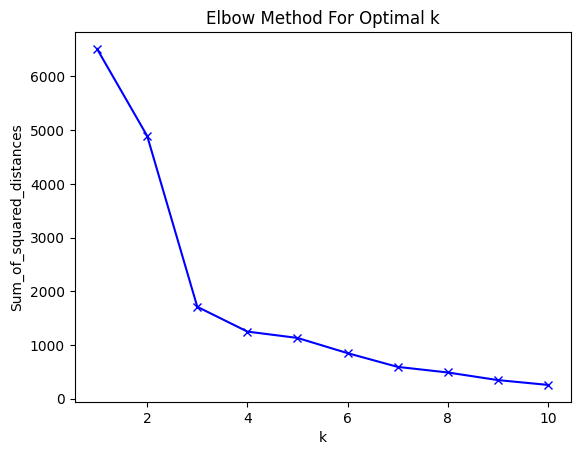

In [ ]:
# Elbow Method
Sum_of_squared_distances = []
K = range(1, 11)
for num_clusters in K:
  kmeans = KMeans(n_clusters = num_clusters)
  kmeans.fit(features)
  Sum_of_squared_distances.append(kmeans.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

K=3 that’s where the "elbow" bends before the sum of squared distances starts to level off.

In [ ]:
# Silhouette Score
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, random_state=0)
  labels = kmeans.fit_predict(features)
  score = silhouette_score(features, labels)
  print(f"Silhouette Score for k={k}: {score:.3f}")

Silhouette Score for k=2: 0.435
Silhouette Score for k=3: 0.493
Silhouette Score for k=4: 0.471
Silhouette Score for k=5: 0.438
Silhouette Score for k=6: 0.455
Silhouette Score for k=7: 0.354
Silhouette Score for k=8: 0.374
Silhouette Score for k=9: 0.325
Silhouette Score for k=10: 0.321


Since we pick the one with the highest score 3 is clearly the number off clusters we need k=3

#Fit KMeans and Label Clusters

In [ ]:
# Fit the model
kmeans = KMeans(n_clusters=3, random_state=0)
features['Cluster'] = kmeans.fit_predict(features)

In [ ]:
# Calculate the cluster means
cluster_means = features.groupby('Cluster')[['Debt_to_GDP_Ratio', 'Interest_to_GDP_Ratio', 'YoY Debt Growth Rate', 'Foreign Interest Share']].mean()

In [ ]:
# Map cluster labels to names based on mean burden
sorted_clusters = cluster_means.mean(axis=1).sort_values().index
cluster_labels = {sorted_clusters[0]: 'Low Fiscal Burden',
                  sorted_clusters[1]: 'Moderate Fiscal Burden',
                  sorted_clusters[2]: 'High Fiscal Burden'}

features['Fiscal Burden'] = features['Cluster'].map(cluster_labels)

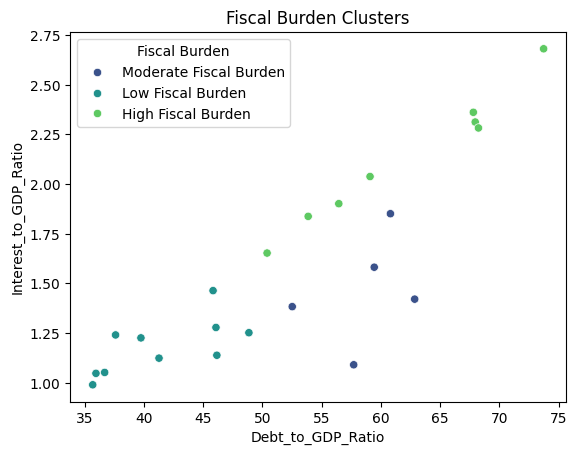

In [ ]:
sns.scatterplot(data=features, x='Debt_to_GDP_Ratio', y='Interest_to_GDP_Ratio', hue='Fiscal Burden', palette='viridis')
plt.title('Fiscal Burden Clusters')
plt.show()

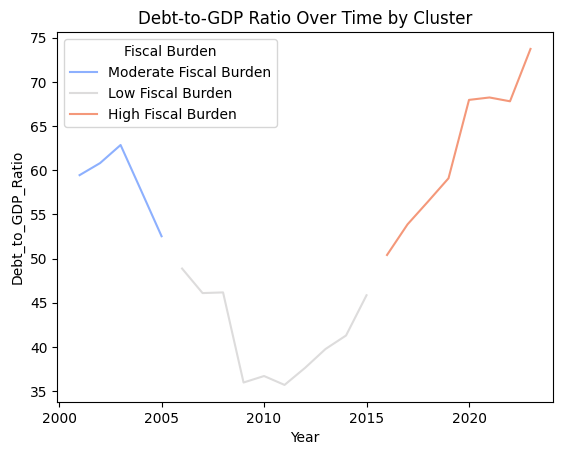

In [ ]:
sns.lineplot(data=features, x='Year', y='Debt_to_GDP_Ratio', hue='Fiscal Burden', palette='coolwarm')
plt.title('Debt-to-GDP Ratio Over Time by Cluster')
plt.show()

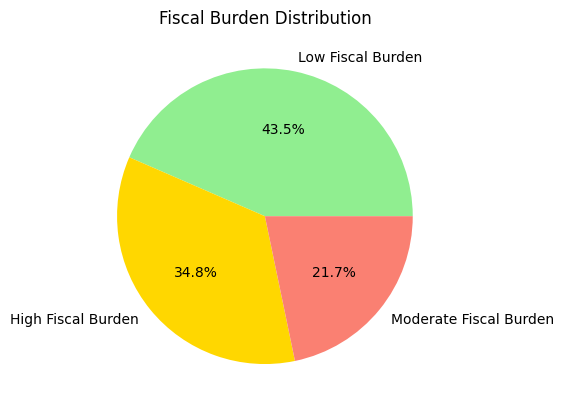

In [ ]:
features['Fiscal Burden'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightgreen','gold','salmon'], title='Fiscal Burden Distribution')
plt.ylabel('')
plt.show()